In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os
import torch.utils.data
from torchvision import transforms as trn

In [32]:
class_mapper = {
    '0': "Pets and animals",
    '1': "Vehicles",
    '2': "Sport & hobby",
    '3': "Home & Garden",
    '4': "Children's Item",
    '5': "Electronics",
    '6': "Personal Items",
    '7': "Other"
}


In [19]:
# define image transformation
centre_crop = trn.Compose([
        trn.ToPILImage(),
        trn.Scale(256),
        trn.CenterCrop(224),
        trn.ToTensor(),
        trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [21]:
model = models.resnet18(pretrained=True)
model.eval();

In [22]:
num_ftrs = model.fc.in_features
num_out_features = model.fc.out_features
model.fc = nn.Linear(num_ftrs, 8)

In [23]:
params = torch.load('../snapshots/saved_model.pth.tar')

In [24]:
model.load_state_dict(params)

In [25]:
import os
from torch.autograd import Variable as V
from torch.nn import functional as f
import skimage.io
from matplotlib import pyplot as plt


In [26]:
data_dir = '../data/val/'

In [27]:
folders = [ os.path.join(data_dir, i) for i in os.listdir(data_dir)]

In [28]:
files_list = os.listdir('../data/val/0')

In [34]:
dset_classes = ['0', '1', '2', '3', '4', '5', '6']

In [51]:
n=3

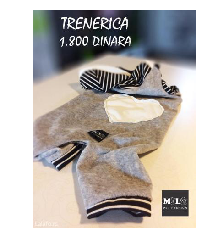

0.463 -> Personal Items
0.179 -> Sport & hobby
0.147 -> Children's Item
0.091 -> Pets and animals
0.087 -> Home & Garden


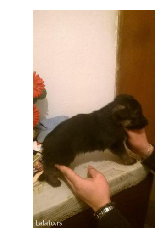

0.766 -> Pets and animals
0.141 -> Children's Item
0.045 -> Personal Items
0.023 -> Sport & hobby
0.012 -> Home & Garden


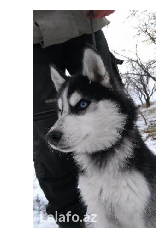

0.863 -> Pets and animals
0.079 -> Vehicles
0.027 -> Personal Items
0.010 -> Electronics
0.010 -> Sport & hobby


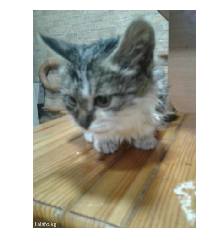

0.985 -> Pets and animals
0.006 -> Children's Item
0.005 -> Home & Garden
0.002 -> Personal Items
0.001 -> Sport & hobby


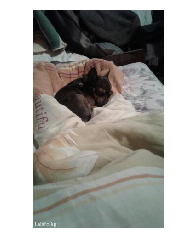

0.920 -> Pets and animals
0.038 -> Children's Item
0.021 -> Home & Garden
0.012 -> Personal Items
0.005 -> Sport & hobby


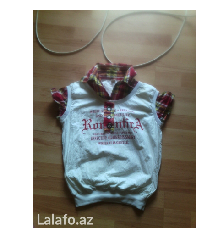

0.697 -> Children's Item
0.221 -> Personal Items
0.060 -> Home & Garden
0.018 -> Sport & hobby
0.003 -> Electronics


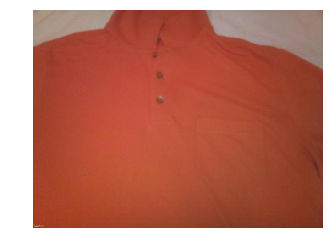

0.421 -> Personal Items
0.288 -> Children's Item
0.140 -> Home & Garden
0.062 -> Electronics
0.039 -> Sport & hobby


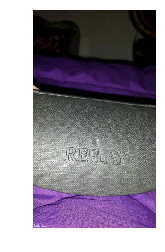

0.513 -> Electronics
0.255 -> Sport & hobby
0.091 -> Home & Garden
0.070 -> Vehicles
0.055 -> Personal Items


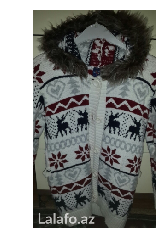

0.677 -> Children's Item
0.150 -> Personal Items
0.132 -> Home & Garden
0.026 -> Sport & hobby
0.007 -> Pets and animals


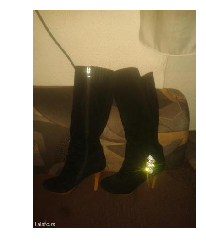

0.697 -> Personal Items
0.147 -> Children's Item
0.085 -> Home & Garden
0.029 -> Sport & hobby
0.020 -> Electronics


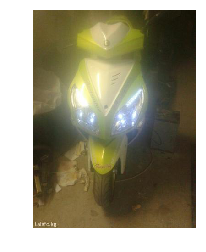

0.385 -> Home & Garden
0.136 -> Vehicles
0.124 -> Electronics
0.124 -> Pets and animals
0.102 -> Children's Item


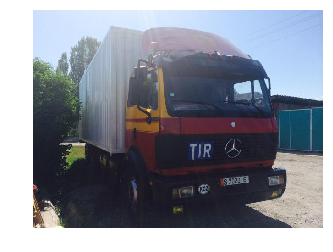

0.990 -> Vehicles
0.005 -> Home & Garden
0.002 -> Pets and animals
0.001 -> Electronics
0.001 -> Sport & hobby


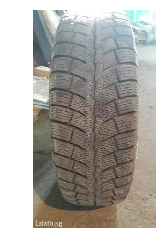

0.413 -> Vehicles
0.353 -> Home & Garden
0.111 -> Sport & hobby
0.045 -> Children's Item
0.040 -> Personal Items


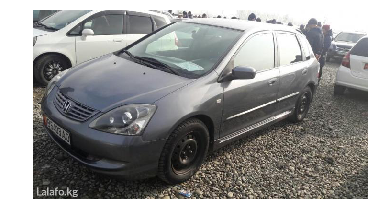

0.999 -> Vehicles
0.000 -> Electronics
0.000 -> Home & Garden
0.000 -> Children's Item
0.000 -> Personal Items


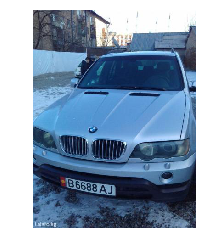

0.999 -> Vehicles
0.000 -> Electronics
0.000 -> Home & Garden
0.000 -> Pets and animals
0.000 -> Sport & hobby


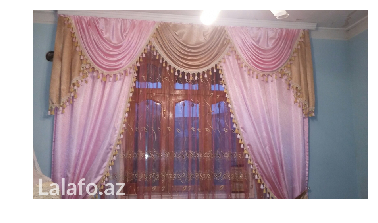

0.707 -> Home & Garden
0.103 -> Personal Items
0.098 -> Children's Item
0.083 -> Sport & hobby
0.004 -> Electronics


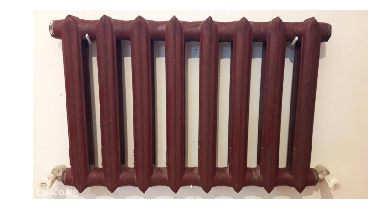

0.655 -> Home & Garden
0.184 -> Children's Item
0.074 -> Sport & hobby
0.044 -> Pets and animals
0.018 -> Personal Items


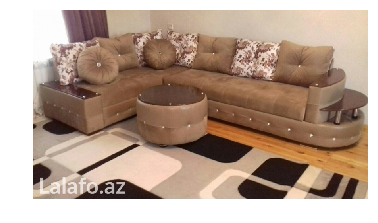

0.947 -> Home & Garden
0.026 -> Children's Item
0.010 -> Personal Items
0.007 -> Pets and animals
0.006 -> Sport & hobby


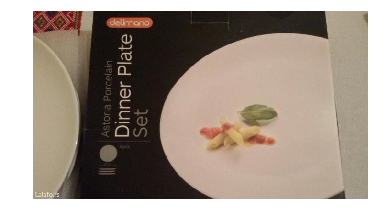

0.491 -> Sport & hobby
0.285 -> Home & Garden
0.085 -> Electronics
0.069 -> Children's Item
0.045 -> Personal Items


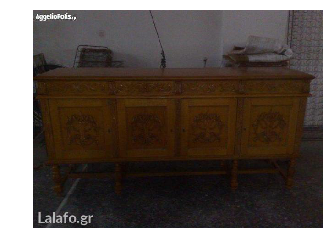

0.850 -> Home & Garden
0.079 -> Pets and animals
0.030 -> Sport & hobby
0.022 -> Children's Item
0.007 -> Vehicles


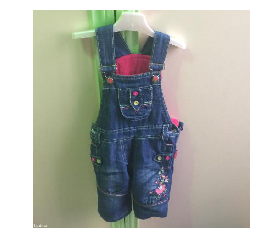

0.578 -> Children's Item
0.261 -> Personal Items
0.077 -> Sport & hobby
0.044 -> Home & Garden
0.021 -> Electronics


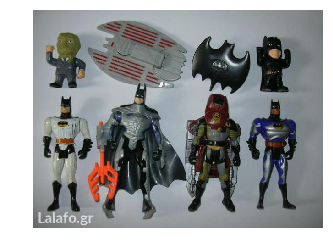

0.385 -> Children's Item
0.295 -> Sport & hobby
0.126 -> Home & Garden
0.105 -> Personal Items
0.051 -> Vehicles


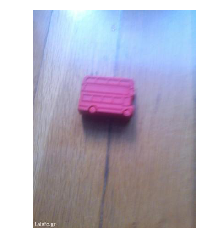

0.329 -> Sport & hobby
0.288 -> Children's Item
0.133 -> Personal Items
0.124 -> Home & Garden
0.077 -> Electronics


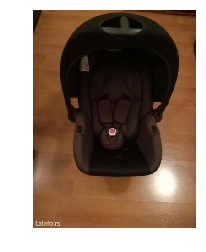

0.489 -> Electronics
0.303 -> Personal Items
0.095 -> Sport & hobby
0.081 -> Children's Item
0.019 -> Vehicles


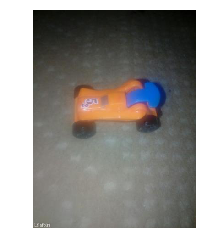

0.370 -> Children's Item
0.183 -> Vehicles
0.166 -> Sport & hobby
0.099 -> Pets and animals
0.086 -> Home & Garden


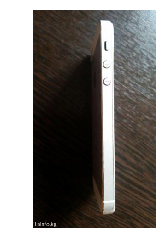

0.950 -> Electronics
0.018 -> Sport & hobby
0.015 -> Home & Garden
0.008 -> Vehicles
0.005 -> Personal Items


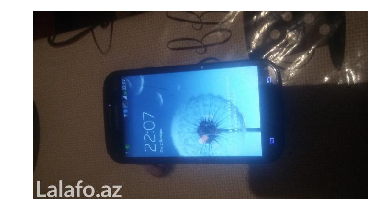

0.979 -> Electronics
0.005 -> Sport & hobby
0.005 -> Home & Garden
0.004 -> Vehicles
0.004 -> Personal Items


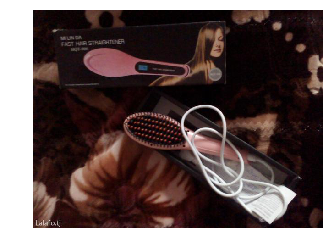

0.320 -> Sport & hobby
0.272 -> Electronics
0.271 -> Personal Items
0.060 -> Home & Garden
0.037 -> Children's Item


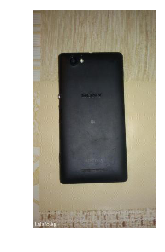

0.900 -> Electronics
0.074 -> Sport & hobby
0.017 -> Personal Items
0.004 -> Vehicles
0.003 -> Home & Garden


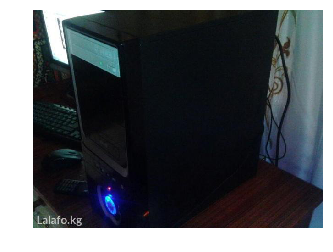

0.667 -> Electronics
0.119 -> Home & Garden
0.081 -> Personal Items
0.062 -> Vehicles
0.028 -> Sport & hobby


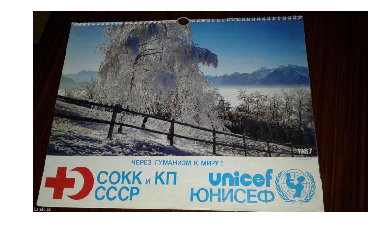

0.316 -> Sport & hobby
0.304 -> Vehicles
0.256 -> Pets and animals
0.041 -> Electronics
0.040 -> Home & Garden


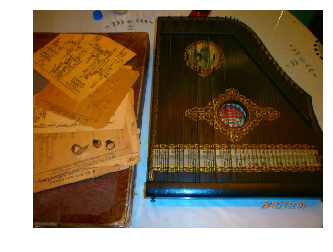

0.738 -> Sport & hobby
0.092 -> Home & Garden
0.090 -> Electronics
0.043 -> Personal Items
0.030 -> Children's Item


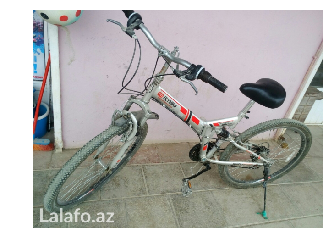

0.583 -> Sport & hobby
0.107 -> Children's Item
0.099 -> Pets and animals
0.074 -> Electronics
0.058 -> Home & Garden


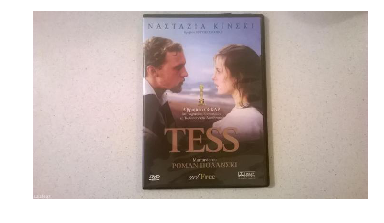

0.755 -> Sport & hobby
0.095 -> Electronics
0.063 -> Home & Garden
0.035 -> Personal Items
0.029 -> Pets and animals


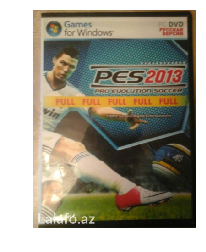

0.614 -> Sport & hobby
0.131 -> Children's Item
0.125 -> Pets and animals
0.053 -> Electronics
0.035 -> Home & Garden


In [56]:
for folder in folders:
    files_list = os.listdir(folder)
    for file in files_list[20:25]:
        # Load image
        img = skimage.io.imread(os.path.join(folder, file))
        plt.imshow(img); plt.axis('off'); plt.show()
        # Preprocess image and convert to tensor
        x = V(centre_crop(img).unsqueeze(0), volatile=True)
        
        #Predict
        logit = model(x)
        h_x = f.softmax(logit).data.squeeze()
        probs, idx = h_x.sort(0, True)
        
        for i in range(0, 5):
            print('{:.3f} -> {}'.format(probs[i], class_mapper[dset_classes[idx[i]]]))